In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
%matplotlib qt

In [28]:
%matplotlib inline

In [29]:
def normalizeVector(vectorArray):
    '''Calculate the normalized vectors of R3 vectors in an array of n vectors'''
    r = np.sqrt(np.sum(vectorArray[:]**2,axis=1)) #Vector lengths
    return(vectorArray/np.transpose([r])) #Return the array of normalized vectors

def eulerAngle(vectorArray):
    '''Calculate the euler angle between adjacent vectors in an array of n vectors'''
    

In [30]:
o1 = np.array([0,0,0])
p1 = np.array([2,3,4])
p2 = np.array([7,3,6])
p3 = np.array([3,6,8])
p4 = np.array([1,0,0])

pointArray = np.array([p1,p2,p3,p4])

pointArrayNormalized = normalizeVector(pointArray)

In [31]:
findAngle = lambda a,b: np.arccos(a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)))

print(findAngle(pointArrayNormalized[0],pointArrayNormalized[3]))

rotAxisVect = np.cross(pointArrayNormalized[0],pointArrayNormalized[3])
rotAxis = np.array([rotAxisVect,-rotAxisVect])
print(rotAxis)

1.1902899496825317
[[ 0.          0.74278135 -0.55708601]
 [-0.         -0.74278135  0.55708601]]


In [32]:
xSet = pointArrayNormalized[:,0]
ySet = pointArrayNormalized[:,1]
zSet = pointArrayNormalized[:,2]

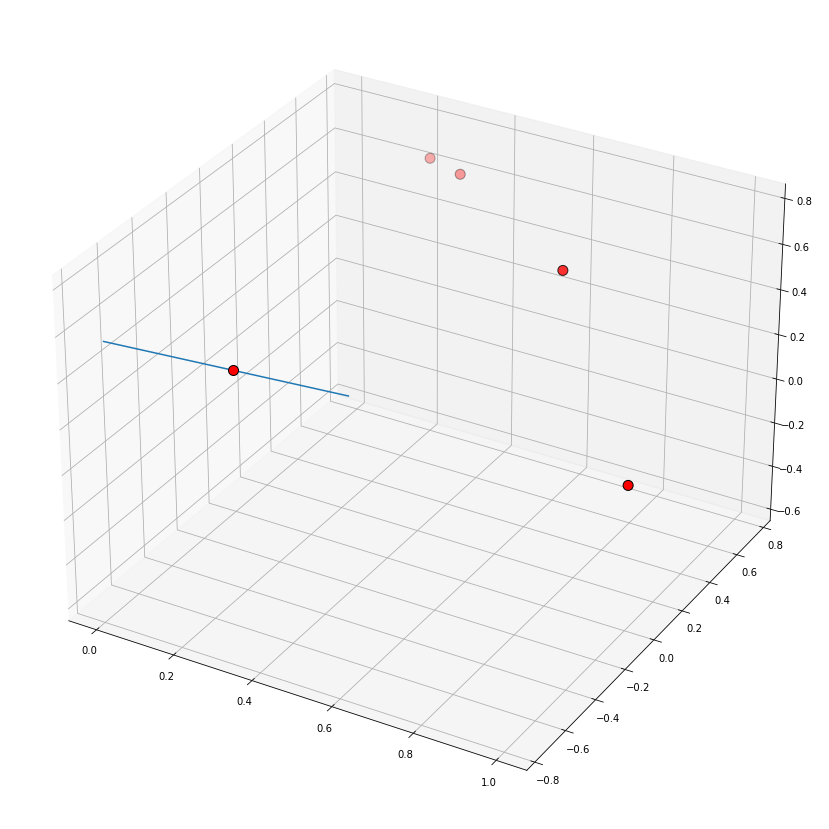

In [36]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(0,0,0,s=100, c = 'red', edgecolors = 'black')
sc = ax.scatter(xSet, ySet, zSet, s=100, c = 'red', edgecolors = 'black')                          
sc = ax.plot3D(rotAxis[:,0],rotAxis[:,1],rotAxis[:,2])
#sc = ax.plot3D([0,2],[0,3],[0,4])

In [34]:
np.loadtxt(r'C:\Users\crazy\PajkosResearch\RawDataFiles\df_angl_FR.csv', usecols = [1,2,3,4], skiprows=7, dtype = float, delimiter = ',')

array([[-5.31800000e-03, -9.61359920e-01,  3.14158264e+00,
         1.41063882e+48],
       [-4.31800000e-03,  1.44650802e+00,  3.14158248e+00,
         1.68937620e+48],
       [-3.31800000e-03,  5.08495532e-01,  3.14157534e+00,
         1.99820702e+48],
       ...,
       [ 4.55163500e-01,  2.61948250e+00,  3.13013428e+00,
         1.98290482e+49],
       [ 4.56163500e-01,  2.61000381e+00,  3.12954030e+00,
         1.98591462e+49],
       [ 4.57163500e-01,  2.59764372e+00,  3.12909457e+00,
         1.98178851e+49]])